In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = "/Users/mehedihasanshahos/Downloads/Attendence Dataset"


In [4]:
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['Student_11', 'Student_16', 'Student_17', 'Student_10', 'X_train.pickle', 'Student_4', 'Student_3', 'Student_2', 'Student_5', 'Y_train.pickle', 'Student_15', 'Student_12', 'Student_13', 'Student_14', 'Student_9', 'Student_7', 'Student_6', 'Student_1', 'Student_8']


NotADirectoryError: [Errno 20] Not a directory: '/Users/mehedihasanshahos/Downloads/Attendence Dataset/X_train.pickle'

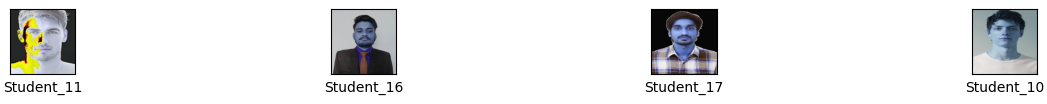

In [5]:
plt.figure(figsize=(20,10))
i=0
for c in CATEGORIES:  
    path = os.path.join(DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show() 

In [14]:
import os
import cv2
import tensorflow as tf
import numpy as np

IMG_SIZE = 227
AUGMENT_COUNT = 10
DATA_DIR = "/Users/mehedihasanshahos/Downloads/Attendence Dataset"

def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_saturation(image, 0.8, 1.2)
    image = tf.image.random_hue(image, 0.02)
    return image

for category in os.listdir(DATA_DIR):
    category_path = os.path.join(DATA_DIR, category)

    if not os.path.isdir(category_path):
        continue

    images = os.listdir(category_path)
    if len(images) == 0:
        continue

    img_path = os.path.join(category_path, images[0])
    img = cv2.imread(img_path)

    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype(np.float32) / 255.0
    img = tf.expand_dims(img, axis=0)

    for i in range(AUGMENT_COUNT):
        aug_img = augment_image(img)
        aug_img = tf.squeeze(aug_img).numpy()
        aug_img = (aug_img * 255).astype(np.uint8)

        save_path = os.path.join(category_path, f"aug_{i}.jpg")
        cv2.imwrite(save_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

    print(f"Augmented images created for {category}")


Augmented images created for Student_11
Augmented images created for Student_16
Augmented images created for Student_17
Augmented images created for Student_10
Augmented images created for Student_4
Augmented images created for Student_3
Augmented images created for Student_2
Augmented images created for Student_5
Augmented images created for Student_15
Augmented images created for Student_12
Augmented images created for Student_13
Augmented images created for Student_14
Augmented images created for Student_9
Augmented images created for Student_7
Augmented images created for Student_6
Augmented images created for Student_1
Augmented images created for Student_8


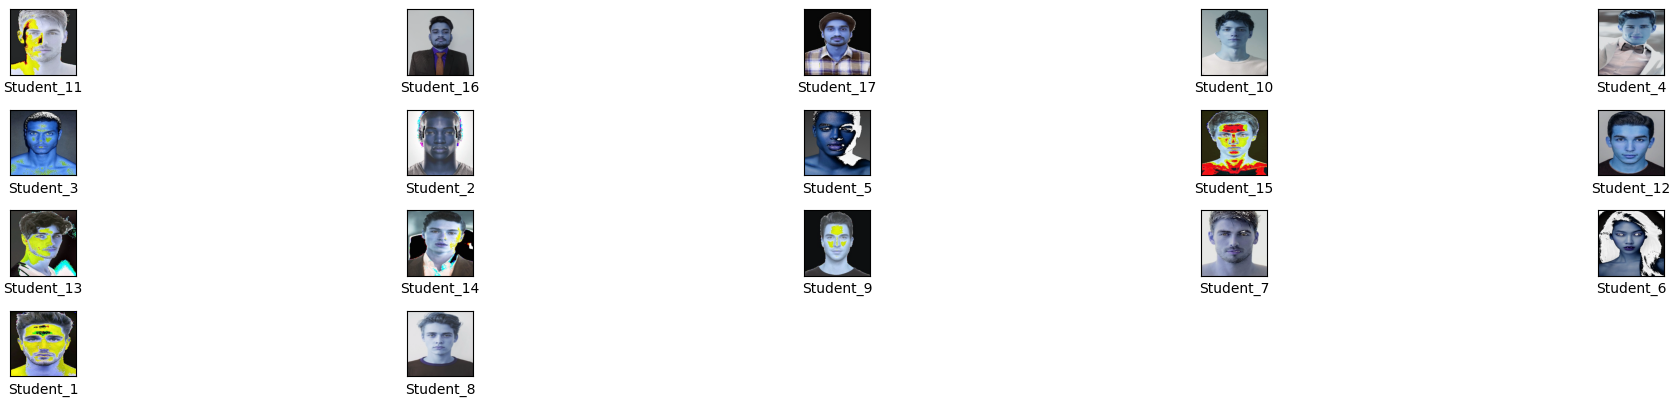

In [15]:
plt.figure(figsize=(20,10))
i=0
for c in CATEGORIES:  
    path = os.path.join(DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show() 

In [18]:
data = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(data))

100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 1300.08it/s]

187


In [19]:
random.shuffle(data)

In [20]:
X_train = []
Y_train = []

for img, label in data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (187, 227, 227, 3) Y_train= (187,)


In [21]:
pickle_out = open("/Users/mehedihasanshahos/Downloads/Attendence Dataset/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("/Users/mehedihasanshahos/Downloads/Attendence Dataset/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()


In [22]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [24]:
pickle_in = open("/Users/mehedihasanshahos/Downloads/Attendence Dataset/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("/Users/mehedihasanshahos/Downloads/Attendence Dataset/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)
print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (187, 227, 227, 3) Y_train= (187,)


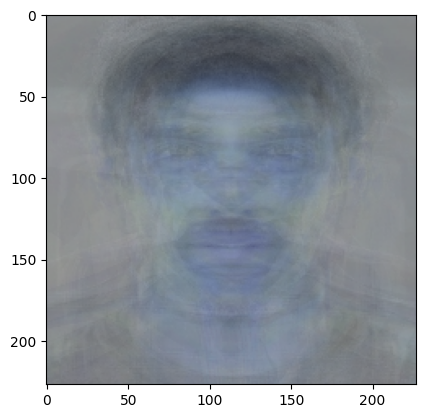

In [25]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [26]:
X_train_norm = X_train-mean_img

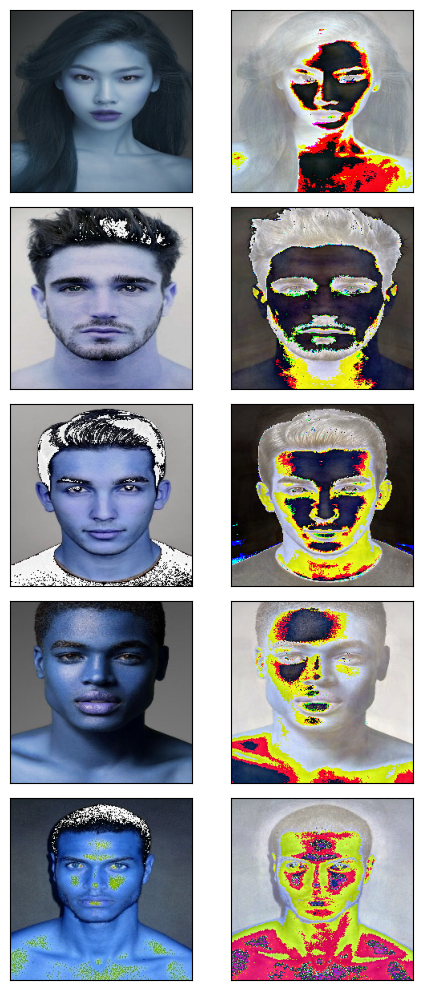

In [27]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [28]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(50),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [29]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [30]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 6s 766ms/step - loss: 4.1684 - accuracy: 0.0535
Epoch 2/100
6/6 [==============================] - 4s 733ms/step - loss: 2.8359 - accuracy: 0.2620
Epoch 3/100
6/6 [==============================] - 5s 775ms/step - loss: 1.5438 - accuracy: 0.6203
Epoch 4/100
6/6 [==============================] - 5s 883ms/step - loss: 0.7338 - accuracy: 0.8182
Epoch 5/100
6/6 [==============================] - 5s 770ms/step - loss: 0.4202 - accuracy: 0.9144
Epoch 6/100
6/6 [==============================] - 5s 756ms/step - loss: 0.3009 - accuracy: 0.9091
Epoch 7/100
6/6 [==============================] - 5s 785ms/step - loss: 0.1877 - accuracy: 0.9519
Epoch 8/100
6/6 [==============================] - 5s 761ms/step - loss: 0.1104 - accuracy: 0.9786
Epoch 9/100
6/6 [==============================] - 5s 755ms/step - loss: 0.0859 - accuracy: 0.9786
Epoch 10/100
6/6 [==============================] - 5s 759ms/step - loss: 0.0771 - accuracy: 0.9840
Epoch 11/

In [1]:
import pandas as pd
from datetime import datetime

# Students list (your labels)
students = CATEGORIES

date_today = datetime.now().strftime("%Y-%m-%d")

attendance_df = pd.DataFrame({
    "Student": students,
    "Status": ["Absent"] * len(students),
    "Time": [None] * len(students)
})

attendance_file = f"attendance_{date_today}.xlsx"
attendance_df.to_excel(attendance_file, index=False)

print("Attendance file created:", attendance_file)


NameError: name 'CATEGORIES' is not defined